<a href="https://colab.research.google.com/github/dhruv21csu155/AIML/blob/main/Exp_7_Multiple_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

for a simple linear regression line is of the form :

y = mx+c

for example if we take a simple example, :

feature 1: TV

feature 2: radio

feature 3:  Newspaper

output variable: sales

Independent variables are the features feature1 , feature 2 and feature 3. Dependent variable is sales. The equation for this problem will be:

y = b0+b1x1+b2x2+b3x3

x1, x2 and x3 are the feature variables.

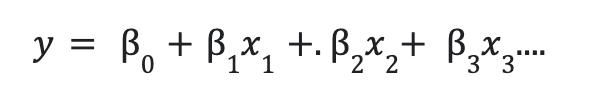

here, y is the dependent variable.

x1, x2,x3,… are independent variables.
b0 =intercept of the line.
b1, b2, … are coefficients.

In [ ]:
# importing modules and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing


In [ ]:
# importing data
df = pd.read_csv('https://raw.githubusercontent.com/Ashutosh-Gairola/I-AI-ML/main/Real-estate1.csv')
df.drop('No', inplace = True,axis=1)

In [ ]:
print(df.columns)

Index(['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')


In [ ]:
print(df.head())



   X1 transaction date  X2 house age  X3 distance to the nearest MRT station  \
0             2012.917          32.0                                84.87882   
1             2012.917          19.5                               306.59470   
2             2013.583          13.3                               561.98450   
3             2013.500          13.3                               561.98450   
4             2012.833           5.0                               390.56840   

   X4 number of convenience stores  X5 latitude  X6 longitude  \
0                               10     24.98298     121.54024   
1                                9     24.98034     121.53951   
2                                5     24.98746     121.54391   
3                                5     24.98746     121.54391   
4                                5     24.97937     121.54245   

   Y house price of unit area  
0                        37.9  
1                        42.2  
2                        47.3  


<Axes: xlabel='X4 number of convenience stores', ylabel='Y house price of unit area'>

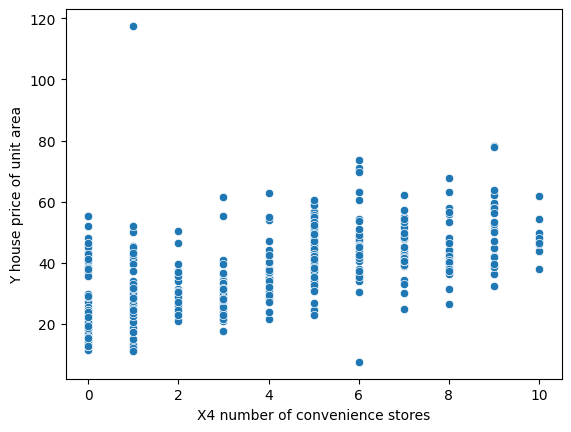

In [ ]:
# plotting a scatterplot
sns.scatterplot(x='X4 number of convenience stores',
				y='Y house price of unit area', data=df)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    float64
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   X5 latitude                             414 non-null    float64
 5   X6 longitude                            414 non-null    float64
 6   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


In [ ]:
df.isnull().sum()

X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [ ]:
df.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [ ]:
# creating feature variables
X = df.drop('Y house price of unit area',axis= 1)
y = df['Y house price of unit area']
print(X)
print(y)


     X1 transaction date  X2 house age  \
0               2012.917          32.0   
1               2012.917          19.5   
2               2013.583          13.3   
3               2013.500          13.3   
4               2012.833           5.0   
..                   ...           ...   
409             2013.000          13.7   
410             2012.667           5.6   
411             2013.250          18.8   
412             2013.000           8.1   
413             2013.500           6.5   

     X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                  84.87882                               10   
1                                 306.59470                                9   
2                                 561.98450                                5   
3                                 561.98450                                5   
4                                 390.56840                                5   
..             

In [ ]:
# creating train and test sets
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101)


In [ ]:
# creating a regression model
model = LinearRegression()


In [ ]:
# fitting the model
model.fit(X_train,y_train)


LinearRegression()

In [ ]:
# making predictions
predictions = model.predict(X_test)
print(predictions)

[12.63830383 10.0304461  22.98807375 48.50264837 32.67140451 37.82572669
 36.09178068 41.05953639 47.84830793 40.4574746  45.0361603  32.86533457
 40.48623576 36.48827849 44.30595729 46.59668235 38.42798244 44.26307337
 48.81959723 45.50409246 42.23260833 54.6526397  48.07373298 37.48194231
 33.57091525 48.26293154 40.23479801 50.42675437 47.22333423 38.99458517
 48.11033139 40.47035604 45.61060308 43.98441528 46.54336092  8.18725886
 38.08375879 39.82608171  8.5339677  55.72740213 32.17950939 49.72698264
 24.85604948 47.64473233 41.23026871 51.17703175 42.04716292 37.32689765
 44.24427856 36.27028988 47.55408451 34.74054504 43.53329366 15.95586215
 38.29001222 48.93912385 44.69790471 44.91934627 45.33972278 41.33035787
 34.39899173 44.02303164 41.99940522 43.9553153  53.61420366 44.24994361
 24.68926603 47.06140631 31.22031534 40.4930635  43.12220556 48.76235412
 15.60855454 35.80561434 12.76370021 42.89308611 34.43839965 45.9734211
 44.1928161  12.0736566  47.42677323 38.74415932 43.

The multi-linear regression model is evaluated with mean_squared_error and mean_absolute_error metric. when compared with the mean of the target variable, we’ll understand how well our model is predicting. mean_squared_error is the mean of the sum of residuals. mean_absolute_error is the mean of the absolute errors of the model. The less the error, the better the model performance is.

mean absolute error = it’s the mean of the sum of the absolute values of residuals.

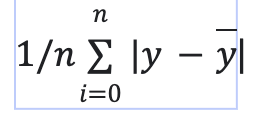

mean square error =  it’s the mean of the sum of the squares of residuals

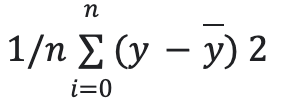

1. y= actual value
2. y hat = predictions

In [ ]:
# model evaluation
print(
'mean_squared_error : ', mean_squared_error(y_test, predictions))
print(
'mean_absolute_error : ', mean_absolute_error(y_test, predictions))


mean_squared_error :  46.21179783492909
mean_absolute_error :  5.392293684756193


In [ ]:
df.columns

Index(['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

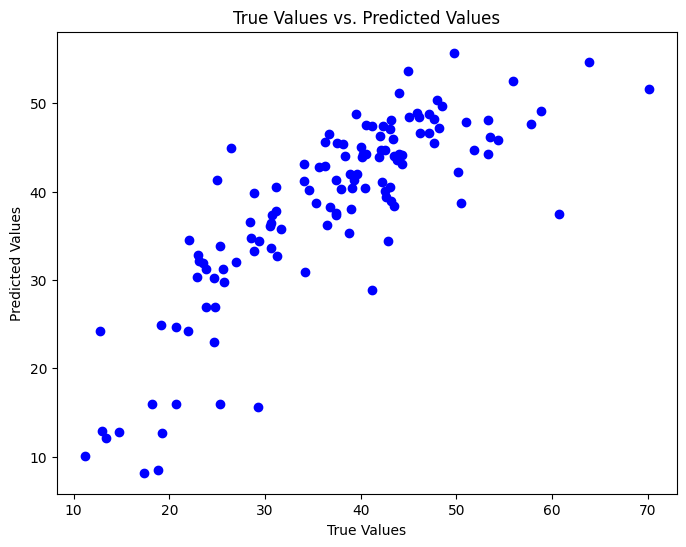

In [ ]:
# Scatter plot between predicted values and true values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, color='blue')
plt.title("True Values vs. Predicted Values")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.show()

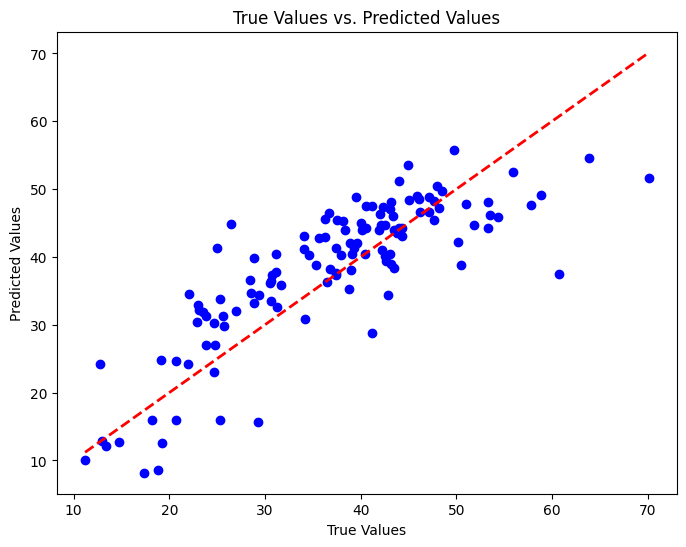

In [ ]:
# Scatter plot between predicted values and true values with a red line
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2)
plt.title("True Values vs. Predicted Values")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.show()